In [1]:
import os, sys

from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node


In [2]:
from skimage.filters import median, gaussian, threshold_otsu
from skimage.morphology import disk, remove_small_objects, binary_closing
from skimage.measure import label, regionprops
from skimage.exposure import rescale_intensity

In [3]:
examples = {
'MD658': [
( 'MD658-F43-2017.04.05-02.10.06_MD658_1_0127', 10228, 9988, 3560, 2168),
( 'MD658-F38-2017.04.05-00.43.15_MD658_1_0112', 7200 ,6464, 6176, 5120),
( 'MD658-F33-2017.04.04-23.12.27_MD658_1_0097', 6912 ,7392, 4320, 3328),
( 'MD658-F60-2017.04.05-06.47.55_MD658_2_0179', 7360 ,6368, 2240 ,2272),
( 'MD658-F61-2017.04.05-07.03.26_MD658_2_0182', 10528, 9536, 2688, 2240)],
'MD657': [
('MD657-F28-2017.02.18-00.45.02_MD657_1_0082', 6624,7264,5536,3008),
( 'MD657-F40-2017.02.18-04.41.42_MD657_2_0119', 7488,8320,4736,4000),
( 'MD657-F34-2017.02.18-02.34.03_MD657_1_0100', 7648,6336,1792,2016),
( 'MD657-F34-2017.02.18-02.34.03_MD657_2_0101', 10848,6848,4160,1760),
('MD657-F40-2017.02.18-04.41.42_MD657_1_0118', 297*32,301*32,85*32,70*32)],
'MD662': [
('MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178', 220*32,199*32,176*32,182*32)],
'MD661':
[
    ('MD662&661-F51-2017.06.06-01.06.07_MD661_3_0153', 199*32, 253*32, 120*32, 131*32)]
    
}

In [18]:
# stack = 'MD662'
# label_channel = 1
# label_clipmax = 1000

stack = 'MD661'
label_channel = 1
label_clipmax = 400

# stack = 'MD657'
# label_channel = 1
# stack = 'MD658'
# label_channel = 0

In [19]:
_, xmin, ymin, w, h = examples[stack][0]
xmax = xmin + w - 1
ymax = ymin + h - 1
print xmin, xmax, ymin, ymax, w, h

6368 10207 8096 12287 3840 4192


In [ ]:
for fn in metadata_cache['valid_filenames']['MD661'][60:80]:

    print fn
    
    img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn)
    img_cropped = img[:, :, label_channel][ymin:ymax+1, xmin:xmax+1]
    img_cropped_contrast_stretched = img_as_ubyte(rescale_intensity(img_cropped, in_range=(0, 1000)))
    
    img_blue_normalized = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn, version='gray')
    img_blue_normalized_cropped = img_blue_normalized[ymin:ymax+1, xmin:xmax+1]
    
    contrast_stretched_img = np.zeros(img_cropped.shape + (3,), np.uint8)
    contrast_stretched_img[..., 1] = img_cropped_contrast_stretched
    contrast_stretched_img[..., 2] = rescale_intensity(-img_blue_normalized_cropped)
    
    plt.figure(figsize=(20, 20));
    plt.imshow(contrast_stretched_img);
    plt.show();

In [6]:
# fn = 'MD657-F40-2017.02.18-04.41.42_MD657_1_0118'
# fn = 'MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178'
fn = 'MD662&661-F51-2017.06.06-01.06.07_MD661_2_0152'
# fn = examples[stack][0][0]

In [7]:
img = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn)
img_cropped = img[:, :, label_channel][ymin:ymax+1, xmin:xmax+1]

/usr/local/lib/python2.7/dist-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
/usr/local/lib/python2.7/dist-packages/skimage/external/tifffile/tifffile.py:2546: UserWarning: unpack: string size must be a multiple of element size
  warnings.warn("unpack: %s" % e)


In [8]:
# plt.figure();
# plt.hist(img_cropped.flatten(), bins=256, log=True);
# plt.show();

In [14]:
img_cropped_contrast_stretched = img_as_ubyte(rescale_intensity(img_cropped, in_range=(0, label_clipmax)))

In [10]:
display_image(img_cropped_contrast_stretched)

/shared/MouseBrainAtlas/preprocess/tmp.jpg

In [11]:
img_blue_normalized = DataManager.load_image_v2(stack=stack, prep_id=2, resol='lossless', fn=fn, version='gray')
img_blue_normalized_cropped = img_blue_normalized[ymin:ymax+1, xmin:xmax+1]

In [59]:
display_image(img_blue_normalized_cropped)

/shared/MouseBrainAtlas/preprocess/tmp.jpg

In [15]:
contrast_stretched_img = np.zeros(img_cropped.shape + (3,), np.uint8)
contrast_stretched_img[..., 1] = img_cropped_contrast_stretched
contrast_stretched_img[..., 2] = rescale_intensity(-img_blue_normalized_cropped)

In [16]:
display_image(contrast_stretched_img)

/shared/MouseBrainAtlas/preprocess/tmp.jpg

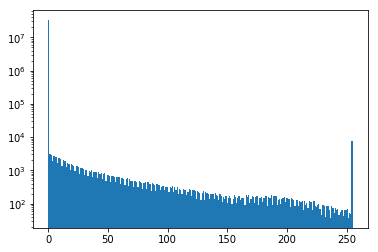

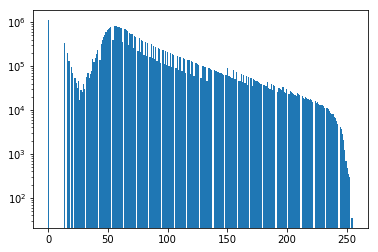

In [92]:
plt.figure();
plt.hist(contrast_stretched_img[..., 1].flatten(), bins=256, log=True);
plt.show();

plt.figure();
plt.hist(contrast_stretched_img[..., 2].flatten(), bins=256, log=True);
plt.show();

In [128]:
output_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=2, 
                                              resol='lossless', fn=fn, version='contrastStretched', 
                                              ext='jpg')

'/shared/CSHL_data_processed/MD662/MD662_prep2_lossless_contrastStretched/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep2_lossless_contrastStretched.jpg'